# Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## 1. Choose a dataset

### a. State which dataset you chose

We chose the **Bank Marketing** dataset as the subject for our project.

### b. Provide a brief (2-4 sentences) description of the dataset. What is this dataset about?

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. in addition to data about each client (record in the dataset) there is also a class column that represents if if the product (bank term deposit) would be ('yes') or not ('no') subscribed - i.e. what was the target result.

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### c. List the features in the dataset and their types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### d. List the number of records in the dataset

In [4]:
print('there are {} records in the dataset.'.format(df.shape[0]))

there are 41188 records in the dataset.


Extra information about the features in the dataset

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

  **Data Features:**
  ##### Bank client data:
   1 - age (numeric) <br>
   2 - job : type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")<br>
   3 - marital : marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")<br>
   5 - default: has credit in default? (categorical: "no", "yes", "unknown")<br>
   6 - housing: has housing loan? (categorical: "no", "yes", "unknown")<br>
   7 - loan: has personal loan? (categorical: "no", "yes", "unknown")<br>
   ##### Related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular", "telephone") <br>
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  10 - day_of_week: last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")<br>
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
   ##### Other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
  14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")<br>
   ##### Social and economic context attributes:<p style="color:Tomato;">Will be discarded</p>
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
  20 - nr.employed: number of employees - quarterly indicator (numeric)<br>
##### Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [6]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Data Preprocessing

In order to cope with the goals we have in analyzing the data, we decided to drop some of the records and attributes which was either unnecessary or affecting the results in a way that not allowing exploring and modeling the data to get genuine conclusions.<br>
We will explain our decisions on each one of the attributes or non-valuable values dropping so it will be clear why we chose to continue without it in our data analysis tasks.

**attributes to drop**

All the social and economic context attributes.

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

They will not be part of our data exploratory analysis because we decided to explore other attributes which seems to be more interesting to deal with. In addition to the fact this specific attributes was less interesting in our opinion, the way that they are listed can cause bias when trying to do deal with prediction algorithms. This will happen because they are identical in large amount of records so for example they can change the result of distance between two neighbors calculations.
 
**non-valuable records**

All the records that no contact have never happened with them (previous = 0) - this data has no meaning when trying to find out meaningful information about our test objectives. We are not testing anything that related to the reason that the marketing campaign could not contact an individual. 

In [7]:
df = df.loc[(df['duration'] != 0)].drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis = 1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


## 2. Exploratory data analysis

The attributes that we exploring their distribution:
<ul>
<li>Age</li>
<li>Duration</li>
<li>Job</li>
<li>Previous</li>
<li>Subscribed</li>
<li>Campaign</li>
</ul>

### Age

In [8]:
age_df = df['age']
age_df.describe()

count    41184.000000
mean        40.023529
std         10.421044
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of Ages')

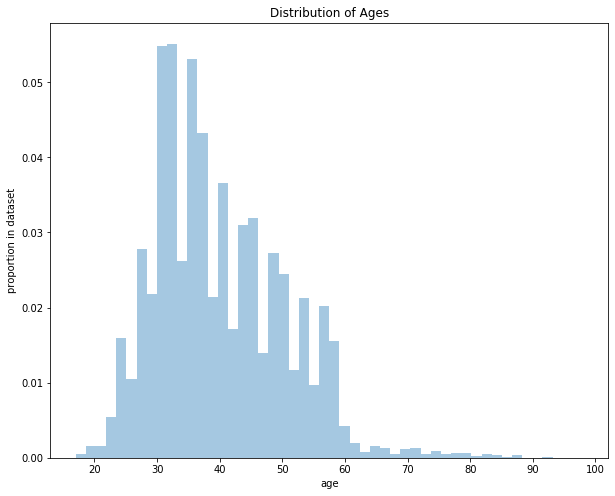

In [9]:
# plot the distribution using distplot

plt.figure(figsize=(10,8))
ax = sns.distplot(age_df, kde=False, norm_hist = True);
ax.set(xlabel='age', ylabel='proportion in dataset');
ax.set_title('Distribution of Ages')

We found that the range of ages of clients in this bank, in this years is between 17 to 98!

### Duration

In [10]:
duration_df = df['duration']
duration_df

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41184, dtype: int64

Text(0.5, 1.0, 'Distribution of Calls Duration')

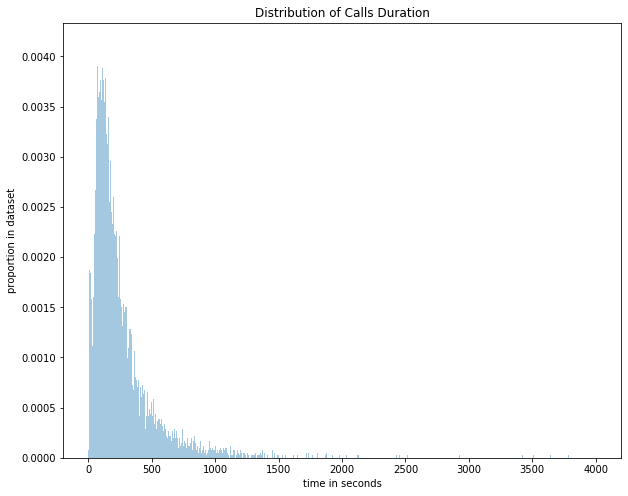

In [11]:
# plot the distribution using distplot

bins = range(0,4000,1)
plt.figure(figsize=(10,8))
ax = sns.distplot(duration_df, kde=False, norm_hist = True, bins = bins);
ax.set(xlabel='time in seconds', ylabel='proportion in dataset');
ax.set_title('Distribution of Calls Duration')

As we already seen in previous "time related" distributions, the duration has an exponential distribution.<br>
We can also observe that most of the conversations with clients took less then 10 minutes.

### Job

In [12]:
job_df = df.loc[df['job'] != 'unknown']
job_df = job_df.groupby(['job']).size().to_frame().reset_index().rename(columns = {0 : 'size'})
job_df

,job,size
0,admin.,10421
1,blue-collar,9252
2,entrepreneur,1456
3,housemaid,1060
4,management,2923
5,retired,1720
6,self-employed,1421
7,services,3969
8,student,875
9,technician,6743


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

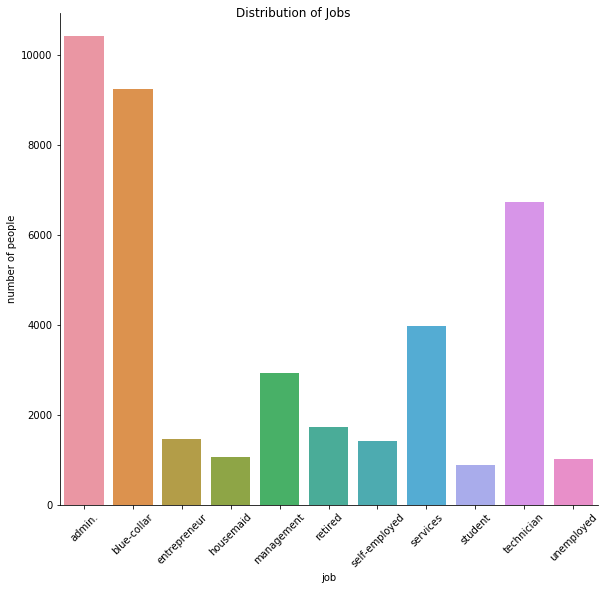

In [13]:
# plot the distribution using catplot

ax = sns.catplot(kind = 'bar',data=job_df, x='job', y='size')
ax.set(xlabel='job', ylabel='number of people')
ax.fig.suptitle('Distribution of Jobs')
ax.fig.set_size_inches(10,8) # set figure size
plt.xticks(rotation = 45)

The latter visualization made us want to know what is the percentage of unemployed costumers:

In [14]:
# calculate the percentage of employment rate:

unemployed_percentage = job_df.iloc[-1][1]/job_df['size'].sum()
employed_percentage = 1 - unemployed_percentage
employment = [unemployed_percentage, employed_percentage]
employment

[0.024820091055955354, 0.9751799089440446]

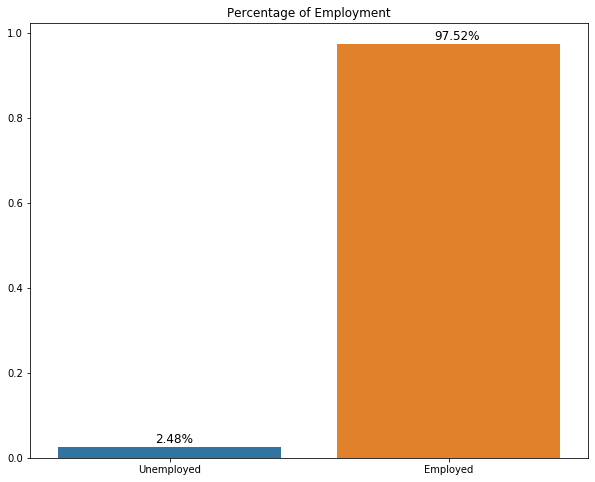

In [15]:
# plot the distribution using barplot

plt.figure(figsize=(10,8))
ax = sns.barplot(x= ["Unemployed","Employed"], y  = employment)
plt.title('Percentage of Employment')

# function that draws the percentage of the attribute above the respected graph

def draw_percentage(plot, feature): # add percentage on top of the bar plot
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()) # round to 2 decimal places after point
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 0.01
        ax.annotate(percentage, (x, y), size = 12)
        
        
draw_percentage(ax, employment)

We can observe that the percentage of unemployed clients in this bank is very low, less then 2.5%!

### Previous

In [16]:
# create binary column that states if one has already been contacted before or not

df['previously_contacted'] = df['previous'].apply(lambda x: 1 if x != 0 else 0)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,previously_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes,0


In [17]:
previous_df = df['previous']
previous_df.describe()

count    41184.000000
mean         0.172980
std          0.494922
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

Text(0.5, 1.0, 'Distribution of Previous Contacts')

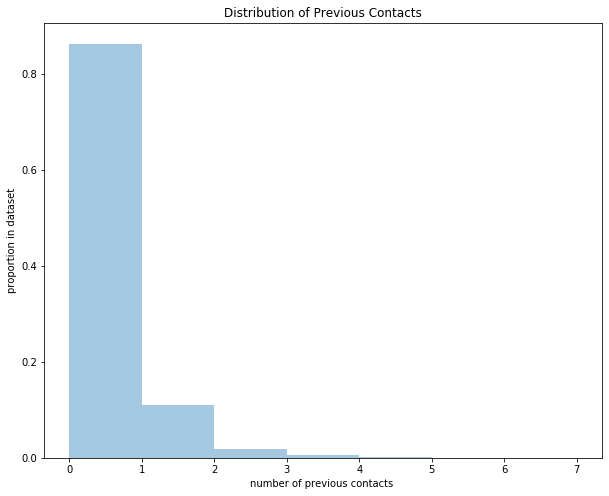

In [18]:
# plot the distribution using distplot

bins = range(0,8,1)
plt.figure(figsize=(10,8))
ax = sns.distplot(previous_df, kde=False, norm_hist = True, bins = bins);
ax.set(xlabel='number of previous contacts ', ylabel='proportion in dataset');
ax.set_title('Distribution of Previous Contacts')

We found the data of previously contacted ('previous' column) interesting and we are going to further examine it in question 3, we created a new binary attribute that separates people that have been contacted in the first time and those who have been contacted before. later we will check if this information affects the decision to subscribe a term deposit.

In [19]:
# calculate the percentage

previously_contacted_true = np.count_nonzero(df['previously_contacted'])/df['previously_contacted'].shape[0]
previously_contacted_false = 1 - previously_contacted_true
previously_contacted = [previously_contacted_true, previously_contacted_false]
previously_contacted

[0.13658216783216784, 0.8634178321678322]

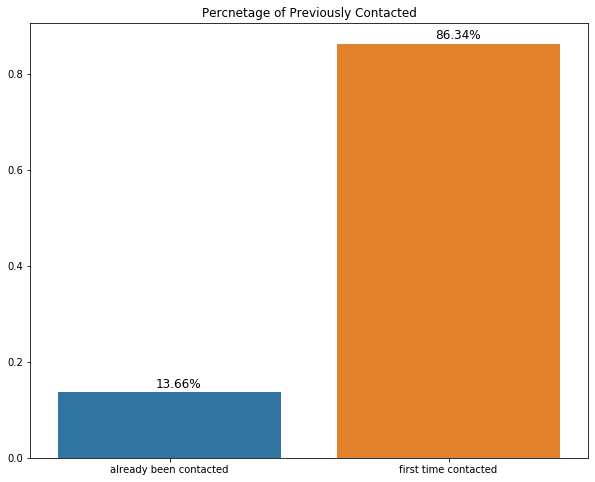

In [20]:
# plot the distribution using barplot

plt.figure(figsize=(10,8))
plt.title('Percnetage of Previously Contacted')
ax = sns.barplot(x= ["already been contacted","first time contacted"], y  = previously_contacted)

# function that draws the percentage of the attribute above the respected graph

def draw_percentage(plot, feature): # add percentage on top of the bar plot
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()) # round to 2 decimal places after point
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 0.01
        ax.annotate(percentage, (x, y), size = 12)
        
        
draw_percentage(ax, previously_contacted)

### Subscribed

we want to change the 'y' column from categorical to numerical so it will be more convenient  to analyze and visualize it.
in addition we want to give meaningful name to the column rather than y, because eventually the main goal of this dataset is to see how successful was the marketing campaigns (how many people have subscribed a term deposit), and this column represent it.

In [21]:
# turn y column to binary

df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# rename column

df = df.rename(columns={'y':'subscribed'})

In [22]:
# calculate the percentage

subscribed_true = np.count_nonzero(df['subscribed'])/df['subscribed'].shape[0]
subscribed_false = 1 - subscribed_true
subscribed = [subscribed_true, subscribed_false]
subscribed

[0.11266511266511267, 0.8873348873348873]

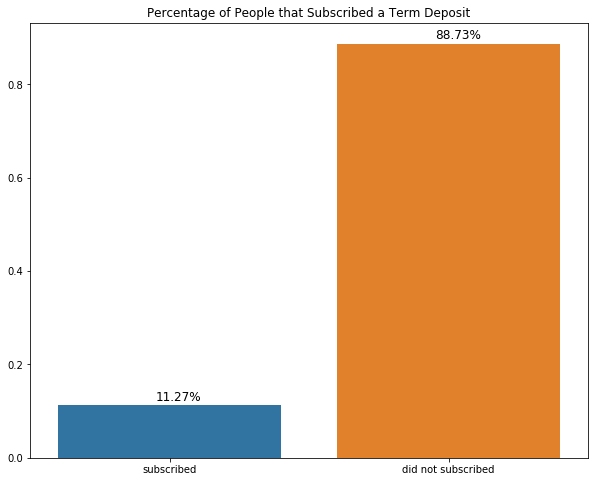

In [23]:
# plot the graph using barplot

plt.figure(figsize=(10,8))
plt.title('Percentage of People that Subscribed a Term Deposit')
ax = sns.barplot(x= ["subscribed","did not subscribed"], y  = subscribed)

def draw_percentage(plot, feature): # add percentage on top of the bar plot
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()) # round to 2 decimal places after point
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 0.01
        ax.annotate(percentage, (x, y), size = 12)
        
        
draw_percentage(ax, subscribed)

### Campaign

In [24]:
campaign_df = df['campaign']
campaign_df.describe()

count    41184.000000
mean         2.567381
std          2.769895
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Text(0.5, 1.0, 'Distribution of Contacts per Person During the Current Campaign')

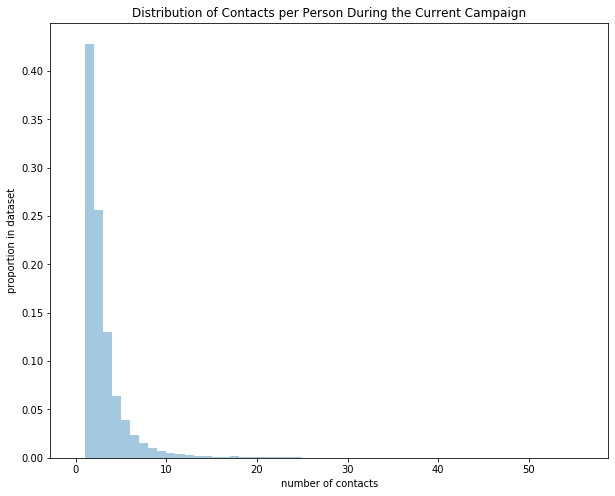

In [25]:
# plot the graph using distplot

bins = range(0,57,1)
plt.figure(figsize=(10,8))
ax = sns.distplot(campaign_df, kde=False, norm_hist = True, bins = bins);
ax.set(xlabel='number of contacts', ylabel='proportion in dataset');
ax.set_title('Distribution of Contacts per Person During the Current Campaign')
# ax.set_yscale('log')

We will try to display the graph with y axis on logarithmic scale to see if there are additional insights we can get.

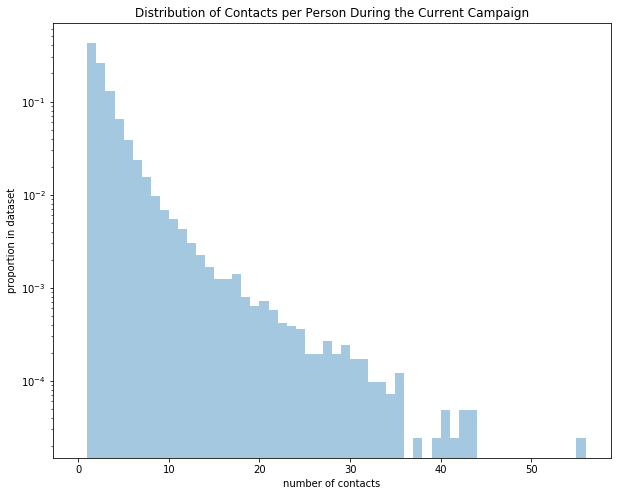

In [26]:
# plot the graph using distplot

bins = range(0,57,1)
plt.figure(figsize=(10,8))
ax = sns.distplot(campaign_df, kde=False, norm_hist = True, bins = bins);
ax.set(xlabel='number of contacts', ylabel='proportion in dataset');
ax.set_title('Distribution of Contacts per Person During the Current Campaign')
ax.set_yscale('log')

we can infer from this distribution that during collecting the data there might have been some measurement bias because its sounds not reasonable that there is a person that have been contacted 56 times during one campaign!

### Relationships

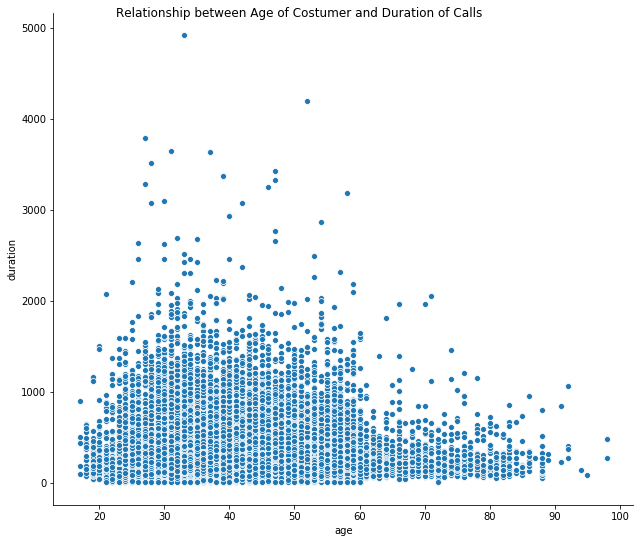

In [27]:
# plot the relationship between age and duration using relplot

sb_obj = sns.relplot(data = df, x="age", y="duration");
sb_obj.fig.suptitle('Relationship between Age of Costumer and Duration of Calls')
sb_obj.fig.set_size_inches(10,8)

In [28]:
# correlation calculation

df['duration'].corr(df['age'])

-0.0008149591515499178

We decided to test the correlation between age and duration. at first, we thought that there is might be a positive correlation but from the graph above it seems to be no correlation between them. we know that most of the people ages are between 30-50, that is why the biggest concentration of records is within that range.

the other correlation we are exploring is the correlation between calls duration to subscribing, we know that the right way to show correlation is using scatterplot but in our case there are many points that go on top of each other and it is not clear what is really going on so we used boxplot and barplot to check for correlation.

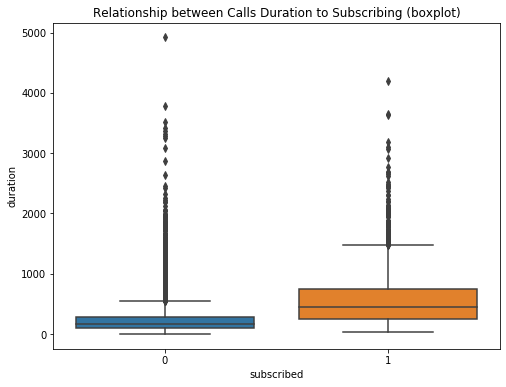

In [29]:
# plot the boxplot presenting several parameters comperisons between subscribing and duration

plt.figure(figsize=(8,6))
plt.title('Relationship between Calls Duration to Subscribing (boxplot)')
sb_obj = sns.boxplot(data = df, x="subscribed", y="duration")

We can see from the visualization above that the 25th percentile, median and 75th percentile calls duration is higher among people that subscribed what might state on positive correlation between these parameters.

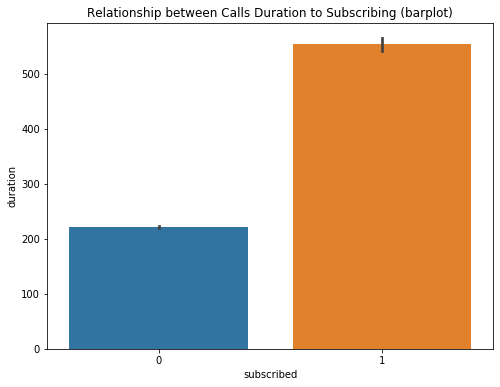

In [30]:
# plot the mean differences between subscribing and duration

plt.figure(figsize=(8,6))
plt.title('Relationship between Calls Duration to Subscribing (barplot)')
sb_obj = sns.barplot(data = df, x="subscribed", y="duration")

It is clear from this graph that there is positive correlation between the two variables.

the correlation value using Pearson method will be:

In [31]:
df['duration'].corr(df['subscribed'])

0.405261355664809

## 3. Estimation and Hypothesis Testing

### a. What is the question you want to explore? Why is it interesting to you?

The question we decided to explore is: **are people that get contacted several times have less chance to subscribe a term deposit?**<br>
When we thought about what might affect our decision if we were offered to subscribe a term deposit from our bank, we got to the conclusion that if we get the same offer or similar one several times, than the chance that we will agree to that offer is getting smaller.<br>
We don't really have a profound reason for that but maybe something about that the bank contacts you more than one time about that same offer they have does the opposite - creates the feeling that its not worthy and that the bank can't sell this product to its customers.<br>
so let's check it out:

### b. Clearly state your null hypothesis and alternative hypothesis.

$H_{0}$ - the mean number of previous contacts with people that have subscribed a term deposit is **equal** to the mean number of previous contacts with people that did not subscribed a term deposit.<br>
$H_{1}$ - the mean number of previous contacts with people that have subscribed a term deposit is **not equal** to the mean number of previous contacts with people that did not subscribed a term deposit.<br>

### c. Run the test and report the results in a comprehensive way.

we have a big and random dataset with diversity of adult men and women, we assume that our dataset is a good representation of the population so we can use the principle of bootstrapping to test our hypothesis.

In [32]:
# function to calculate the difference between two averages

def diff_of_avgs(df, column_name, grouping_var):
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs[1] - avgs[0] 


def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications) # create empty list with the size of wanted number of replications
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

According to the discipline learned in class, we chose to test the null hypothesis under 95% confidence interval:

In [33]:
# run the bootstrap procedure

bstrap_diffs = bootstrap_mean_difference(df, 'previous', 'subscribed',  5000)

# Get the endpoints of the 95% confidence interval

left_end = np.percentile(bstrap_diffs, 2.5, interpolation='higher')
right_end = np.percentile(bstrap_diffs, 97.5, interpolation='higher')
confidence_interval = [left_end, right_end]
print('The 95% bootstrap confidence interval for difference between previous contacts means', confidence_interval)

The 95% bootstrap confidence interval for difference between previous contacts means [0.33498708492445944, 0.38596920251644945]


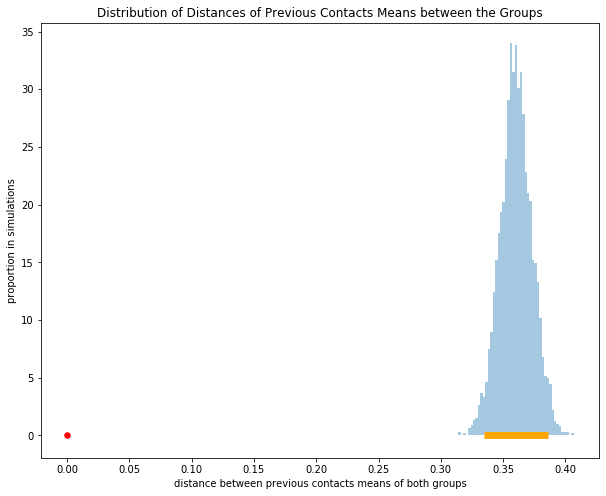

In [34]:
# visualize results

plt.figure(figsize = (10,8))
ax = sns.distplot(bstrap_diffs, kde=False, norm_hist = True);
ax.set(xlabel='distance between previous contacts means of both groups', ylabel='proportion in simulations');
ax.set_title('Distribution of Distances of Previous Contacts Means between the Groups')

# add the confidence interval and null hypothesis mark to the plot

plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7)  # lw controls thickness of line
plt.scatter(0, 0, color='red', s=30) # draw the null hypothesis mark

Does the null hypothesis value found within the confidence interval (95%)?

In [35]:
null_hypothesis_value = 0
if(left_end <= null_hypothesis_value <= right_end):
    print('You can\'t eliminate the null hypothesis.')
else:
    print('There is 95% confidence to eliminate the null hypothesis.')

There is 95% confidence to eliminate the null hypothesis.


### 4. Prediction

### a. What do you want to try to classify? Why?

We want to classify people that subscribed a term deposit and those who don't. this information can be very meaningful if we have a data about a specific person and we would like to know according to the data we have about him if he is likely to subscribe a term deposit or maybe give advices to the marketing team about best ways and times for interacting with their possible costumers.

first, before choosing what features we want to use to predict the 'subscribed' target variable we need to check which of the features have a good correlation and what features have correlations that might affect the result badly.<br>
the steps will be as follows:<br>

1. encoding categorical variables - to get equal distance between all possible values
2. standardizing the variables - to prevent prediction differs due to different units
3. creating a heatmap of correlation between the variables - to visualize the correlation values
4. extracting the variables that seems to have the best fit (according to the correlation values) with the desired target results - to proceed with the classification process

**encoding categorical variables:**

first drop any rows that includes 'unknown':

In [36]:
for column in df.columns:
    df = df.drop(df[df[column].astype(str) == 'unknown'].index)

In [37]:
df.shape

(30484, 17)

In [38]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,subscribed,previously_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,0,0


turn any possible variable('default', 'housing' and 'loan') to binary variable:

In [39]:
binary_variables = ['default', 'housing', 'loan']
for var in binary_variables:
    df[var] = df[var].apply(lambda x: 1 if x == 'yes' else 0)

In [40]:
df = df.reset_index(drop = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,subscribed,previously_contacted
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,0,0
1,37,services,married,high.school,0,1,0,telephone,may,mon,226,1,999,0,nonexistent,0,0
2,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,0,0
3,56,services,married,high.school,0,0,1,telephone,may,mon,307,1,999,0,nonexistent,0,0
4,59,admin.,married,professional.course,0,0,0,telephone,may,mon,139,1,999,0,nonexistent,0,0


We are deleting 'pdays' attribute because its values are mostly 999 which not really represents the desired meaning of it in the context of previous day passed from the last contact with that same individual. in addition we have good coverage of similar data using the previous attribute.

In [41]:
df = df.drop('previously_contacted', axis = 1)

We decided to treat all the categorical variables as nominal and encode them using dummies method: 

In [62]:
variables_to_encode = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
df_encoded = pd.get_dummies(df, columns=variables_to_encode, prefix=variables_to_encode)
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,0,261,1,999,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,37,0,1,0,226,1,999,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,40,0,0,0,151,1,999,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,56,0,0,1,307,1,999,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,59,0,0,0,139,1,999,0,0,1,...,0,0,0,1,0,0,0,0,1,0


**standardizing the variables**

To standardizing the variables we will use min-max scaling:

$\dfrac{x_i - min(X)}{max(X) - min(X)}$

In [43]:
from sklearn import preprocessing

df_encoded_columns = df_encoded.columns
scaler = preprocessing.MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(df_encoded)
scaled_df = pd.DataFrame(scaled_np_matrix, columns=df_encoded_columns)
scaled_df

,age,default,housing,loan,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.500000,0.0,0.0,0.0,0.052878,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.256410,0.0,1.0,0.0,0.045760,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.294872,0.0,0.0,0.0,0.030506,0.000000,1.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500000,0.0,0.0,1.0,0.062233,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.538462,0.0,0.0,0.0,0.028066,0.000000,1.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30479,0.717949,0.0,1.0,0.0,0.067724,0.000000,1.0,0.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30480,0.371795,0.0,0.0,0.0,0.077690,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30481,0.500000,0.0,1.0,0.0,0.038235,0.023810,1.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30482,0.346154,0.0,0.0,0.0,0.089689,0.000000,1.0,0.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Note: we also tried to use z-score normalizing method but it turned out to be less precise in the prediction algorithm

In [44]:
# optional z-score normalizeing:

# columns_to_normalize = ['age', 'duration', 'campaign']
# for column in columns_to_normalize:
#     df_encoded[column] = df_encoded[column].apply(lambda x: (x - df_encoded[column].mean())/df_encoded[column].std())

**creating a heatmap**

heatmap before encoding:

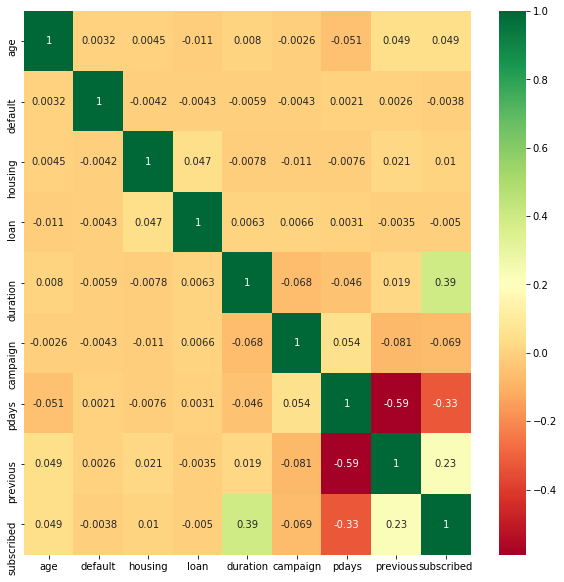

In [45]:
# compute correlation between each pair of variables in data frame
correlations = df.corr()

#plot heat map
plt.figure(figsize=(10,10))
g=sns.heatmap(correlations,annot=True,cmap="RdYlGn")

heatmap after encoding:

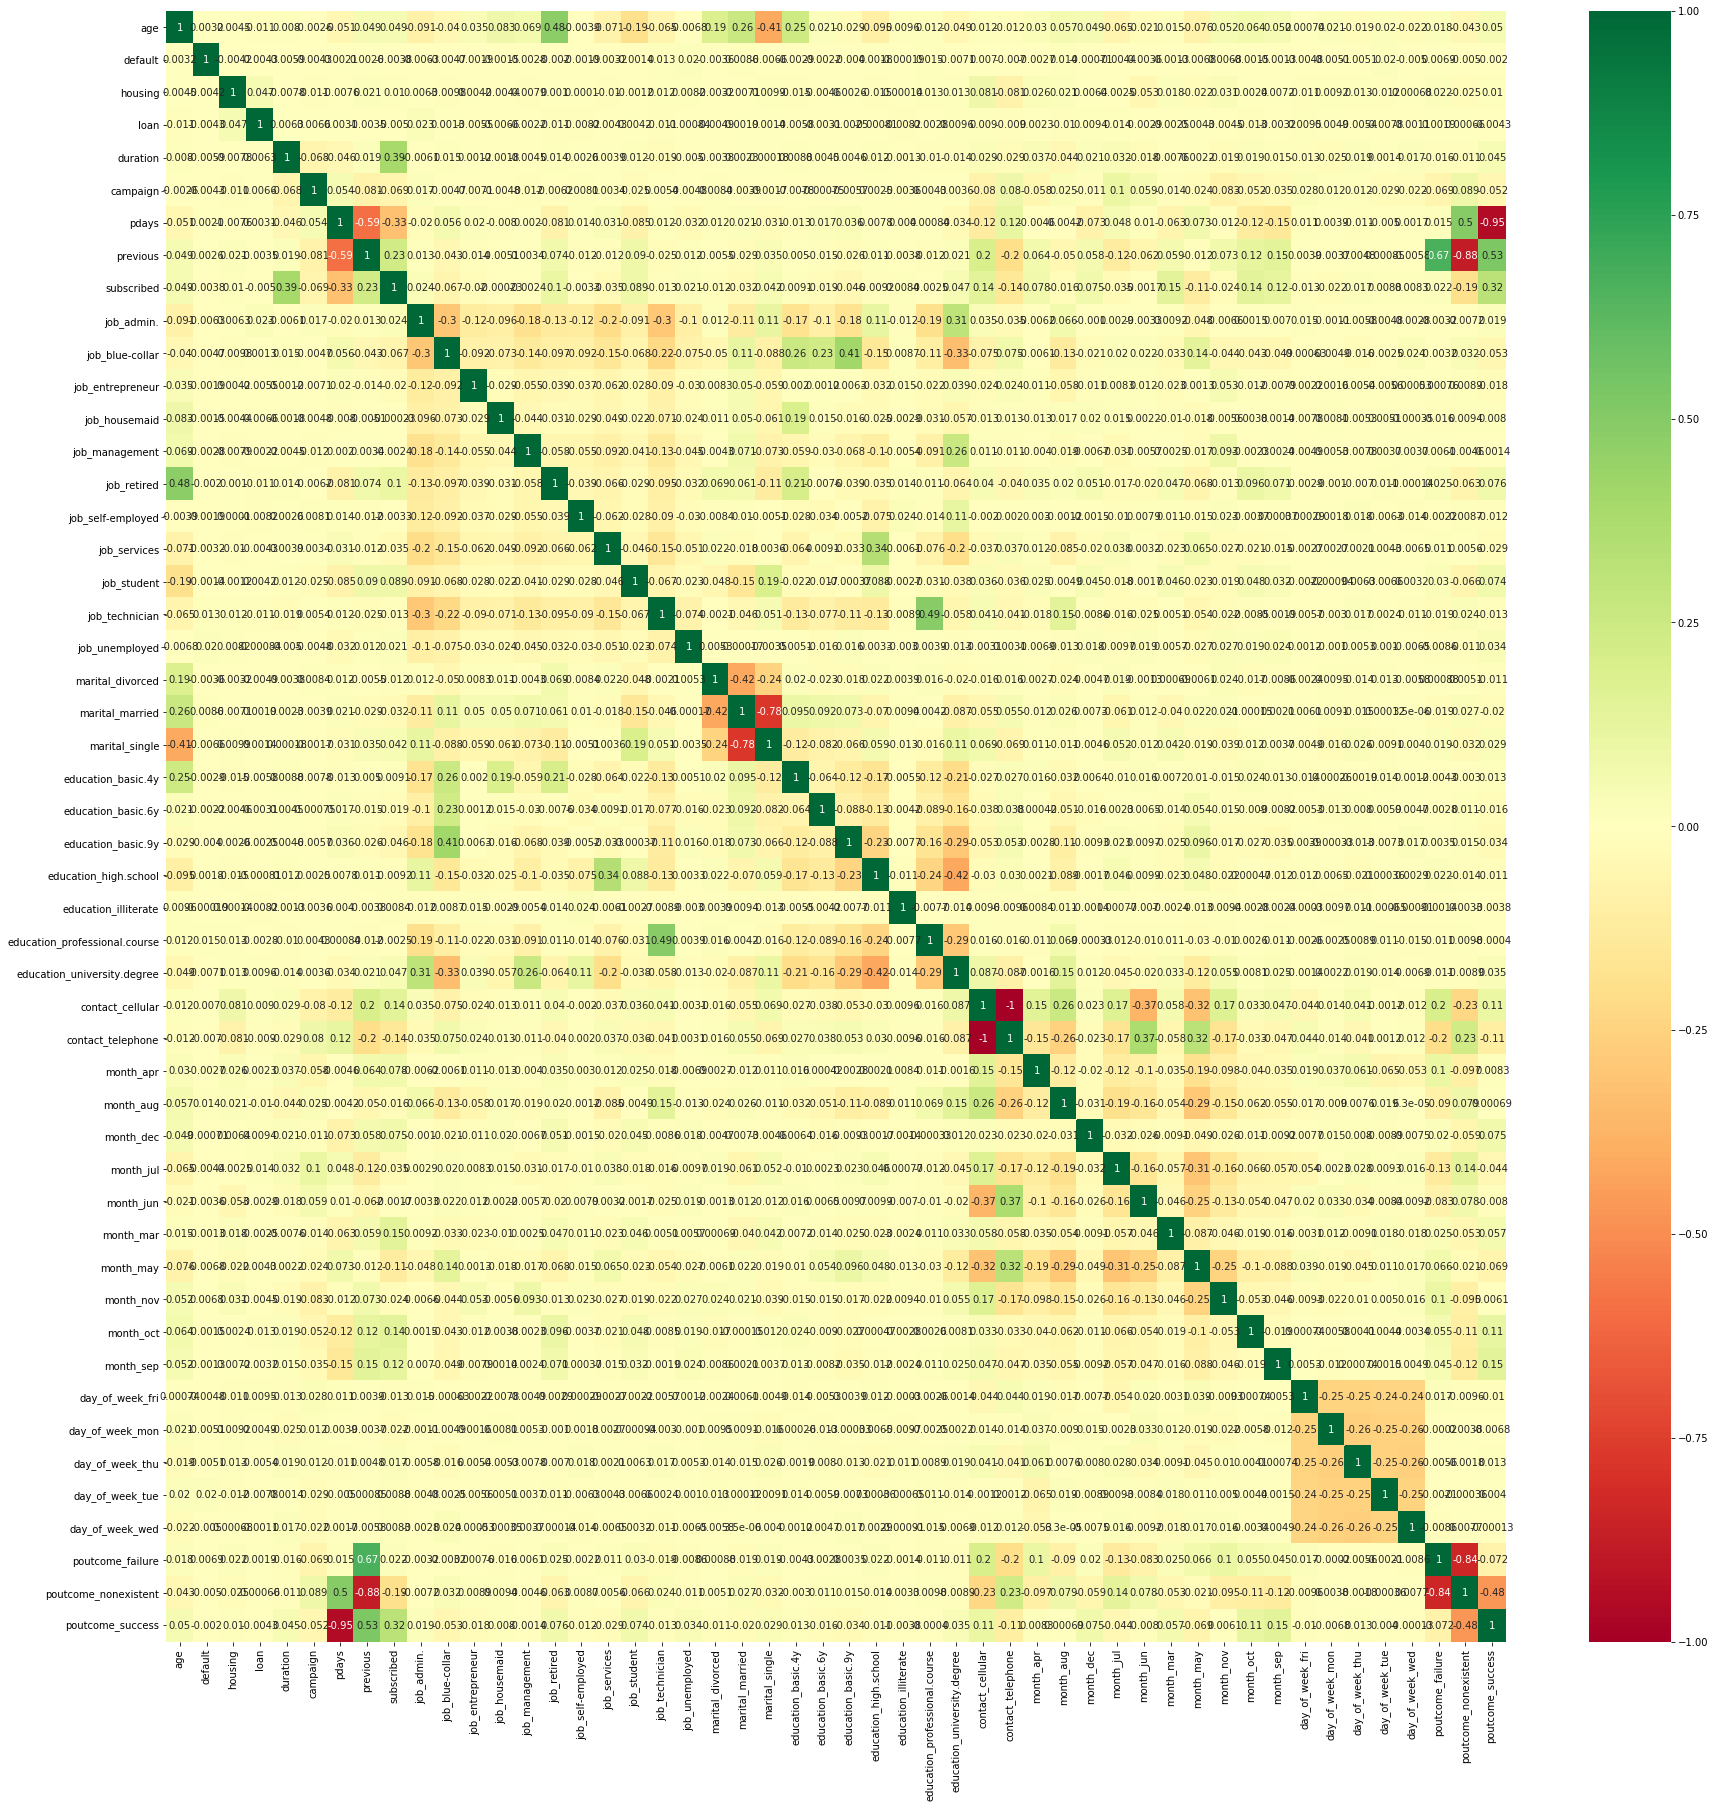

In [46]:
# compute correlation between each pair of variables in data frame
correlations = scaled_df.corr()

#plot heat map
plt.figure(figsize=(30,30))
g=sns.heatmap(correlations,annot=True,cmap="RdYlGn")

The heatmap after the one hot did not gave us any useful insights about the data...

### b. Clearly state what is the target variable (class) you are trying to predict, which variables (features) you are using to predict the class, and why you chose them.

**extracting the variables**

Our test subject is 'subscribed', will be used as our class. Using to the heatmap we found two values we are going to use for the prediction - 'duration' and 'pdays', we chose them because they have the largest |correlation| with the target. we will use cross validation to test range of different k values to choose which one is the best and then were going to train a KNN classifier to predict the test results and compare it to the true value of the class.

### c. Use KNN for the classification task and report the results.

In [47]:
# First, define which variables are the features and which are the labels
predictor_columns = ['duration','pdays']
X = scaled_df.loc[:,predictor_columns].values # features
Y = scaled_df.loc[:, 'subscribed'].values # labels

# Next, split them to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def kNN_score_testing(k_to_test):
    '''This function returns an array of cross-validation mean scores for each of one of the k's
    k_to_test: values between 1 to this given parameter will be tested '''
    cv_scores = np.empty(k_to_test)
    for i in range(k_to_test):
        knn_cv = KNeighborsClassifier(n_neighbors = i+1)
        cv_scores[i] = np.mean(cross_val_score(knn_cv, X_train, Y_train, cv=5))
    return cv_scores

In [49]:
k_folds_accuracy_scores = kNN_score_testing(100)
k_folds_accuracy_scores

array([0.83991509, 0.8815353 , 0.87694239, 0.88538973, 0.88411866,
       0.88969546, 0.88883437, 0.89026954, 0.89067959, 0.89113055,
       0.89113062, 0.89223771, 0.89129461, 0.89174564, 0.89121257,
       0.8913355 , 0.89154063, 0.89207369, 0.89145867, 0.89199174,
       0.8921148 , 0.89236082, 0.8919098 , 0.8924838 , 0.89190977,
       0.89215582, 0.89219682, 0.89264793, 0.89219683, 0.89231987,
       0.89277086, 0.89281185, 0.89305788, 0.89260685, 0.89354997,
       0.89383703, 0.89367304, 0.89359102, 0.893386  , 0.89326298,
       0.89404214, 0.89375507, 0.8942881 , 0.89412408, 0.8940831 ,
       0.89408309, 0.89424711, 0.89400109, 0.89465719, 0.89416512,
       0.89396011, 0.89404206, 0.89396008, 0.89424707, 0.8940011 ,
       0.89432907, 0.89408309, 0.8942881 , 0.89432914, 0.89424711,
       0.89396009, 0.89457512, 0.89469814, 0.89424704, 0.89408307,
       0.89412405, 0.89420606, 0.89420603, 0.89441107, 0.89432903,
       0.89445205, 0.89482109, 0.89420602, 0.89428802, 0.89465

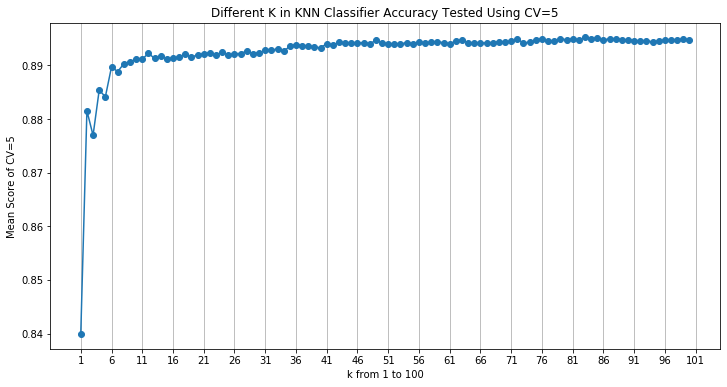

In [50]:
# plot the graph of each of the K scores acquired using the CV

k_list = list(range(1, 101))

plt.figure(figsize=(12,6))
plt.plot( k_list, k_folds_accuracy_scores, '-o')
plt.title('Different K in KNN Classifier Accuracy Tested Using CV=5')
plt.xticks(range(1, 105, 5))
plt.xlabel('k from 1 to 100')
plt.ylabel('Mean Score of CV=5')
plt.grid(axis= 'x')

In [51]:
print("The best result acquired using k = {}\nIts score using CV = 5 is {}".format(np.argmax(k_folds_accuracy_scores), k_folds_accuracy_scores[np.argmax(k_folds_accuracy_scores)]))

The best result acquired using k = 82
Its score using CV = 5 is 0.8951901651474994


In [52]:
# finally, train a classifier 
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=51)  # n_neighbors is the number of neighbors to use for classification
knn_classifier.fit(X_train, Y_train)


# check our predictions!
knn_classifier.score(X_test, Y_test)

0.8965064785960308

We got a pretty good results!<br>
It can be observed that even though the correlation between the variables we used as our predictors in our KNN classification to the class was not very high (around |0.35|)  and yet the classifier got a pretty good score that we are going to further analyze right away.

### Results Analysis

#### Confusion Matrix

The confusion matrix is a summary of prediction results on a classification problem. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives insights not only into the errors being made by your classifier but more importantly the types of errors that are being made.

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
knn_pred = knn_classifier.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, knn_pred)
print('KNN Confusion Matrix\n', confusion_matrix)

KNN Confusion Matrix
 [[5158  135]
 [ 496  308]]


In [54]:
True_positive = confusion_matrix[0][0]
False_negative = confusion_matrix[1][0]
False_positive = confusion_matrix[0][1]
True_negative = confusion_matrix[1][1]

In [55]:
print("True Positive : {}".format(True_positive))
print("False Negative : {}".format(False_negative))
print("False Positive : {}".format(False_positive))
print("True Negative : {}".format(True_negative))

True Positive : 5158
False Negative : 496
False Positive : 135
True Negative : 308


#### Sensitivity \ Recall

probability of a positive classification given that observation is positive.

In [56]:
Recall = True_positive/(True_positive+False_negative)
print("the Recall rate is {}".format(Recall))

the Recall rate is 0.9122744959320834


In [57]:
print("we got a probability of {} , so we can saftly be sure about our classification.".format(Recall))

we got a probability of 0.9122744959320834 , so we can saftly be sure about our classification.


#### Precision

Precision rate is the probability of actual positive out of predicted positive.

In [58]:
Precision = True_positive/(True_positive+False_positive)
print("the precision rate is {}".format(Precision))

the precision rate is 0.9744946155299452


#### Specificity

probability of a negative classification given that observation is negative.

In [59]:
Specificity = True_negative/(True_negative+False_positive)
print("the Specificity rate is {}".format(Specificity))

the Specificity rate is 0.6952595936794582


#### F1 score

F1 provides a single score that balances both the concerns of precision and recall in one number.
To assess the F1 score we will need to consider the precision and the recall calculations, F1 score is the harmonic mean of the precision and recall.

In [60]:
F1 = 2*((Precision*Recall)/(Precision+Recall))

In [61]:
print("Our F1 score is {} , F1 score reaches it's best value at 1 (perfect precision and recall), so we think we got a very good result.".format(F1))

Our F1 score is 0.9423586370695167 , F1 score reaches it's best value at 1 (perfect precision and recall), so we think we got a very good result.
